# Neural Net with TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('vectorized_letters_training.csv')

In [3]:
label = df.pop('label')

#### Create a mutation function that will change a specified number of bits for each letter

In [4]:
def mutate_feature_changeBit(dataframe, number_of_mutations, seed = 0):
    def changeBit(x):
        if x == 1:
            return 0
        else:
            return 1
    
    np.random.seed(seed)
    
    dft = dataframe.transpose().copy()
    for mutations in range(0, number_of_mutations):
        for col in dft:
            point_mutation = int(np.random.uniform(low = 0, high = len(dft)))
            dft[col].iloc[point_mutation] = changeBit(dft[col].iloc[point_mutation])
        
    return dft.transpose()

##### Confirm mutation function works

Make the observation that some bits have changed.

In [5]:
# pd.concat([df.iloc[0], mutate_feature_changeBit(df, 1, seed=5).iloc[0]],axis = 1)

##### Create mutants of training set as test set

In [6]:
n_mutants = 10
n_mutations = 5
mutant_dfs = [mutate_feature_changeBit(df, n_mutations, seed = n).copy() for n in range(1, n_mutants)]
mutant_dfs = [pd.concat([mutant, label], axis = 1) for mutant in mutant_dfs]

In [7]:
#mutant_dfs = [mutant_df.loc[:, ~mutant_df.columns.duplicated()] for mutant_df in mutant_dfs]

In [8]:
from IPython.display import display

In [9]:
for df,n in zip(mutant_dfs,range(0,len(mutant_dfs))):
    print('index: '+str(n))
    display(df.head(5))
    print('---------------------------------------------')

index: 0


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,1,1,1,0,0,0,1,0,...,1,1,1,1,1,1,0,1,1,A
1,1,1,1,1,1,1,0,1,0,0,...,0,1,1,1,1,0,1,1,1,B
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,1,1,1,0,1,C
3,1,1,0,1,0,0,0,1,0,0,...,1,1,1,1,1,0,1,1,0,D
4,1,1,1,1,1,1,1,0,1,0,...,0,0,1,1,1,1,1,1,1,E


---------------------------------------------
index: 1


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,0,1,1,0,0,0,1,1,...,1,0,1,1,0,0,0,1,1,A
1,1,0,1,1,1,1,0,1,0,0,...,0,0,1,1,1,0,1,1,1,B
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,C
3,1,0,1,1,0,0,0,1,0,1,...,1,0,1,1,1,0,1,0,0,D
4,1,1,1,1,1,1,0,1,0,0,...,0,0,0,1,1,1,1,1,1,E


---------------------------------------------
index: 2


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,1,1,1,0,0,0,1,1,...,1,0,1,1,0,0,0,0,1,A
1,1,1,1,1,0,1,0,1,0,0,...,0,1,1,1,1,1,1,1,1,B
2,0,0,0,1,0,1,1,0,1,1,...,0,0,0,0,1,1,1,1,1,C
3,1,1,1,1,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,0,D
4,1,1,1,1,1,1,1,1,0,0,...,1,0,1,0,1,0,1,1,1,E


---------------------------------------------
index: 3


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,1,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,A
1,1,1,1,1,1,1,0,1,0,1,...,0,1,1,1,1,1,1,1,1,B
2,0,0,0,1,0,1,1,0,1,0,...,0,0,0,0,1,1,1,0,1,C
3,1,1,1,1,0,0,0,1,1,0,...,1,0,1,1,1,1,1,0,0,D
4,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,0,0,1,1,E


---------------------------------------------
index: 4


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,1,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,1,1,A
1,1,1,1,1,0,1,0,0,0,0,...,0,1,0,1,1,1,1,1,1,B
2,0,0,0,1,1,0,1,0,1,1,...,0,0,0,1,1,1,1,1,1,C
3,1,1,1,1,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,D
4,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,0,1,0,1,E


---------------------------------------------
index: 5


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,1,1,1,0,0,0,1,0,...,1,1,1,0,0,0,0,1,1,A
1,1,1,1,1,0,1,0,1,0,0,...,0,1,1,1,1,0,1,1,1,B
2,0,1,0,1,1,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,C
3,1,1,0,1,0,0,0,1,0,0,...,1,0,1,1,1,1,1,0,0,D
4,1,1,1,1,1,0,1,1,0,1,...,0,0,1,1,1,1,0,1,1,E


---------------------------------------------
index: 6


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,1,0,1,0,0,0,1,1,...,1,1,1,1,0,0,0,1,1,A
1,1,1,1,1,1,1,0,0,0,0,...,0,1,1,1,1,1,0,1,1,B
2,0,0,0,1,1,1,1,0,1,1,...,1,0,0,0,1,1,1,0,0,C
3,0,1,1,1,0,0,0,1,0,0,...,1,0,1,1,1,1,0,0,0,D
4,1,1,1,1,0,1,1,1,0,0,...,0,0,1,1,1,1,1,0,1,E


---------------------------------------------
index: 7


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,0,0,1,1,1,0,0,0,1,1,...,1,0,0,1,0,0,0,1,1,A
1,1,1,1,1,1,1,0,0,0,0,...,0,1,1,1,1,1,1,0,1,B
2,0,0,0,1,1,1,1,0,1,1,...,0,0,1,0,1,0,1,1,1,C
3,1,1,1,1,1,0,0,1,0,0,...,1,0,1,1,1,1,1,0,0,D
4,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,1,E


---------------------------------------------
index: 8


,A1,B1,C1,D1,E1,F1,G1,A2,B2,C2,...,F6,G6,A7,B7,C7,D7,E7,F7,G7,label
0,1,0,1,1,1,1,1,0,1,1,...,1,1,1,1,0,0,0,1,1,A
1,1,1,0,1,1,0,0,1,0,0,...,0,1,1,1,1,1,1,1,1,B
2,0,1,0,1,1,1,1,0,1,1,...,0,1,0,0,1,0,1,1,1,C
3,1,1,1,1,0,0,1,1,0,0,...,1,0,1,1,1,1,1,0,0,D
4,1,1,1,1,1,1,0,1,0,0,...,0,0,1,1,1,1,0,1,1,E


---------------------------------------------


#### Setup the tensorflow architecture

In [10]:
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(166, activation = 'relu', input_shape = [input_shape]),
        layers.Dense(52, activation = 'softmax')
    ])
    
    opt = tf.keras.optimizers.SGD(learning_rate = 0.3, momentum = 0.2)
    
    model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = opt,
        metrics = ['accuracy', 'mae', 'mse', 'acc', 'crossentropy']
    )
    
    return model

#### Map each label to an integer

In [11]:
label_map = np.array([i for i in range(0,len(df))])
label_mapping = pd.DataFrame([label_map, label])
label_mapping = label_mapping.transpose().rename(columns = {0:'label', 1:'class'})

In [12]:
mapping_dict = label_mapping.set_index('class').to_dict()

In [13]:
inv_mapping_dict = {v: k for k, v in mapping_dict['label'].items()}

#### Setup the training dataset

In [14]:
y_train = label
y_train = y_train.values
x_train = df.drop('label', axis = 1).values

In [15]:
y_train_mapped = np.array([mapping_dict['label'][y] for y in y_train])

#### Setup the testing dataset

In [16]:
test_df = mutant_dfs[0].sample(frac = 1, random_state = 1).sample(frac = 0.35, random_state = 1).copy()

In [17]:
y_test = test_df.pop('label')
x_test = test_df

In [18]:
y_test_mapped = np.array([mapping_dict['label'][y] for y in y_test])

In [19]:
y_test_mapped

array([29, 42, 16, 28, 14,  5, 46,  6, 15, 34, 10, 32, 13,  8, 17, 49, 50,
        1])

#### Build model

In [20]:
np.random.seed(1)
tf.random.set_seed(1)

In [21]:
model = build_model(len(df.drop('label', axis = 1).keys()))

#### Setup callbacks for tensorboard

In [22]:
import datetime
import os

In [23]:
log_dir = os.path.join(
    'logs',
    'fit',
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
)

In [24]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

#### Fit the model to the training dataset and use the test set for validation

In [25]:
history = model.fit(
    x_train,
    y_train_mapped,
    batch_size = 16,
    epochs = 2000,
    validation_data = (x_test, y_test_mapped),
    verbose = 0 #,
    #callbacks = [tensorboard_callbacks]
)

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,mae,mse,acc,crossentropy,val_loss,val_accuracy,val_mae,val_mse,val_acc,val_crossentropy,epoch
1995,3.079082,0.903846,25.48151,874.536987,0.903846,1.130553,3.441236,0.611111,23.036327,773.957397,0.611111,1.963989,1995
1996,3.079082,0.903846,25.48151,874.536987,0.903846,1.130717,3.441165,0.611111,23.036325,773.957336,0.611111,1.964175,1996
1997,3.079081,0.903846,25.48151,874.536865,0.903846,1.130821,3.441040,0.611111,23.036325,773.957336,0.611111,1.963685,1997
1998,3.079081,0.903846,25.48151,874.536987,0.903846,1.130684,3.440953,0.611111,23.036325,773.957336,0.611111,1.963307,1998
1999,3.079080,0.903846,25.48151,874.536804,0.903846,1.130564,3.440809,0.611111,23.036327,773.957336,0.611111,1.962690,1999


#### View tensorboard

In [27]:
#%load_ext tensorboard

In [28]:
#%tensorboard --logdir logs/fit

#### Plot the graphs for each metric

In [29]:
import matplotlib.pyplot as plt

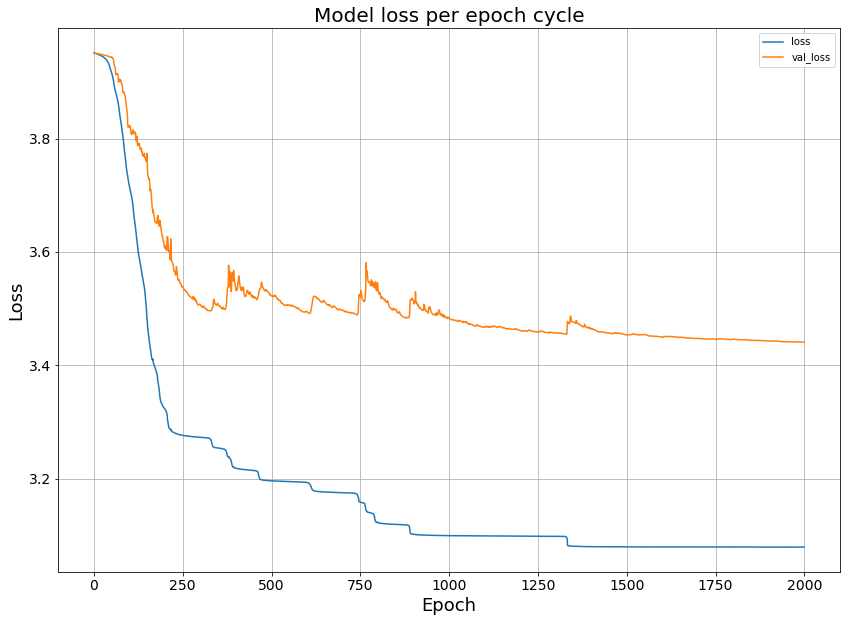

In [30]:
ax = hist.set_index('epoch').plot(
    y = ['loss','val_loss'],
    figsize = (14,10),
    grid = True, 
    #xticks = range(0,120,20),
    #yticks = np.arange(3, 4.1, 0.2),
    title = 'Model loss per epoch cycle',
    fontsize = 14
)

ax.set_ylabel('Loss', fontsize = 18)
ax.set_xlabel('Epoch', fontsize = 18)
ax.title.set_size(20)
plt.show()

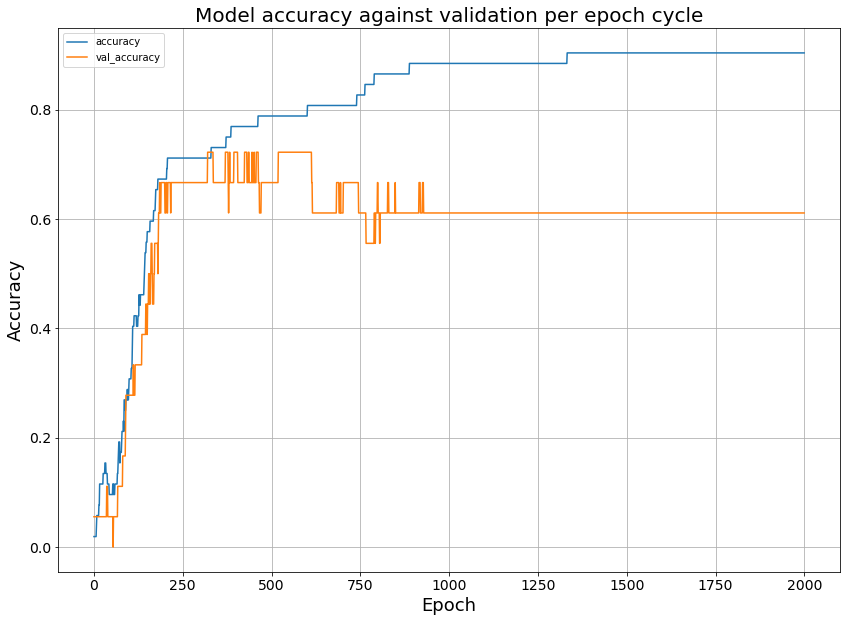

In [31]:
ax = hist.set_index('epoch').plot(
    y = ['accuracy','val_accuracy'],
    figsize = (14,10),
    grid = True, 
    #xticks = range(0,120,20),
    title = 'Model accuracy against validation per epoch cycle',
    fontsize = 14
)

ax.set_ylabel('Accuracy', fontsize = 18)
ax.set_xlabel('Epoch', fontsize = 18)
ax.title.set_size(20)
plt.show()

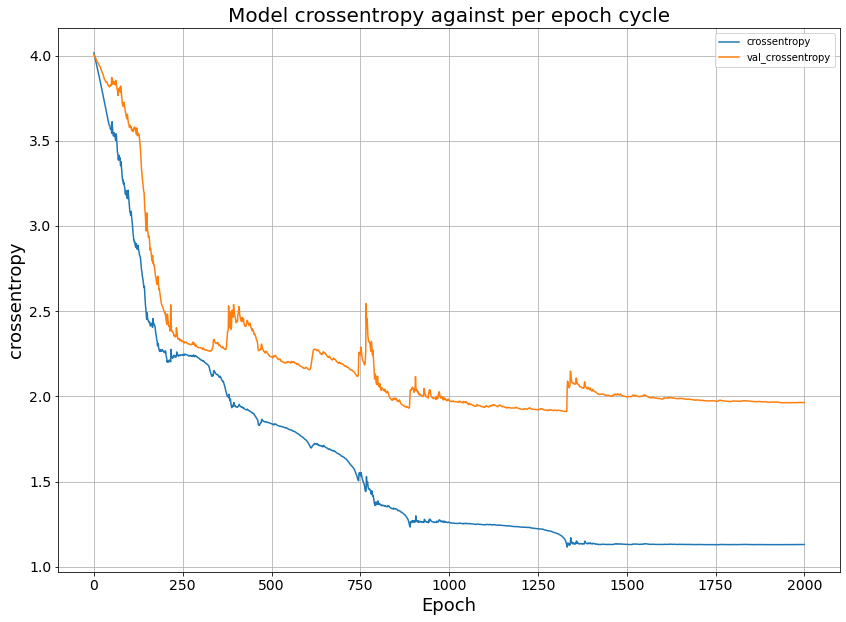

In [32]:
ax = hist.set_index('epoch').plot(
    y = ['crossentropy','val_crossentropy'],
    figsize = (14,10),
    grid = True, 
    #xticks = range(0,120,20),
    title = 'Model crossentropy against per epoch cycle',
    fontsize = 14
)

ax.set_ylabel('crossentropy', fontsize = 18)
ax.set_xlabel('Epoch', fontsize = 18)
ax.title.set_size(20)

In [33]:
# ax = hist.set_index('epoch').plot(
#     y = ['mse','val_mse'],
#     figsize = (14,10),
#     grid = True, 
#     #xticks = range(0,120,20),
#     title = 'Model MSE against per epoch cycle',
#     fontsize = 14
# )

# ax.set_ylabel('mse', fontsize = 18)
# ax.set_xlabel('Epoch', fontsize = 18)
# ax.title.set_size(20)

In [34]:
# ax = hist.set_index('epoch').plot(
#     y = ['mae','val_mae'],
#     figsize = (14,10),
#     grid = True, 
#     #xticks = range(0,120,20),
#     title = 'Model MAE against per epoch cycle',
#     fontsize = 14
# )

# ax.set_ylabel('mae', fontsize = 18)
# ax.set_xlabel('Epoch', fontsize = 18)
# ax.title.set_size(20)

In [35]:
#model.save('mdl_adam_text.h5')

#### Use the model to make predictions on the test set.

In [36]:
predictions = model.predict(x_test)

In [37]:
most_probable_prediction = [np.argmax(prediction) for prediction in predictions]
print(most_probable_prediction)

[40, 42, 14, 28, 14, 17, 46, 6, 15, 31, 3, 32, 13, 8, 17, 49, 49, 4]


In [38]:
prediction_letters = [inv_mapping_dict[v] for v in most_probable_prediction]
print(prediction_letters)

['o', 'q', 'O', 'c', 'O', 'R', 'u', 'G', 'P', 'f', 'D', 'g', 'N', 'I', 'R', 'x', 'x', 'E']


In [39]:
compare_df = pd.concat([y_test.reset_index(drop = True),pd.Series(prediction_letters, name = 'prediction')], axis = 1)
compare_df['correct'] = compare_df.label==compare_df.prediction

In [40]:
def color_red_green(val):
    color = 'red' if (val == False) else 'green' if (val == True) else 'black'
    return 'color: %s' % color

In [41]:
compare_df.style.applymap(color_red_green)

,label,prediction,correct
0,d,o,False
1,q,q,True
2,Q,O,False
3,c,c,True
4,O,O,True
5,F,R,False
6,u,u,True
7,G,G,True
8,P,P,True
9,i,f,False


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
y_true = compare_df.label.values
y_pred = compare_df.prediction.values
labels = label.values

In [44]:
np.set_printoptions(threshold = np.inf)
print(confusion_matrix(y_true, y_pred, labels = y_true))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


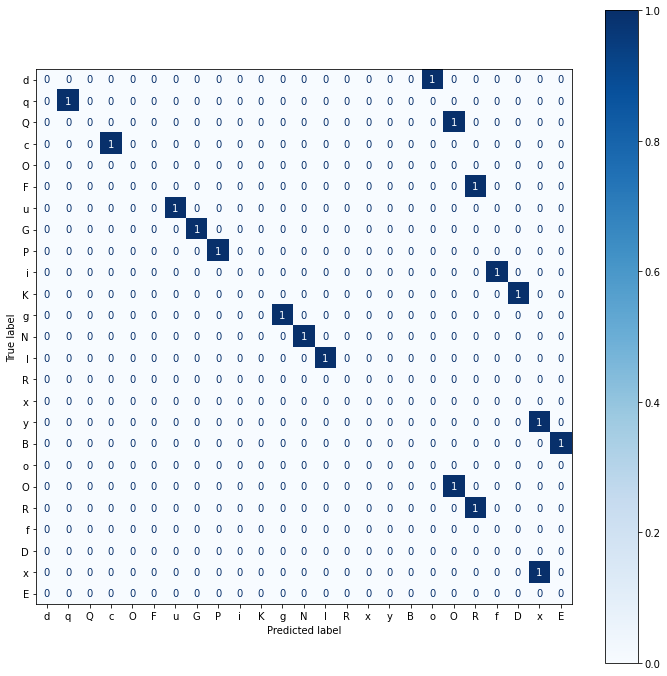

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12, 12))

matrix_labels = y_true.copy()
matrix_labels = np.append(matrix_labels, compare_df[compare_df['correct'] == False]['prediction'].values)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true, y_pred, labels = matrix_labels),
                              display_labels = matrix_labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values = True,
                 cmap= plt.cm.Blues, ax = ax, xticks_rotation = 'horizontal')

plt.show()

#### Test the other mutants

Build functions that will easily compute the above.

In [46]:
def preprocess_test_set(dataset, dictionary_label_map, r_state = 1):
    test_df = dataset.sample(frac = 1, random_state = r_state).sample(frac = 0.25, random_state = r_state).copy()
    y_test = test_df.pop('label')
    x_test = test_df
    y_test_mapped = np.array([dictionary_label_map[y] for y in y_test])
    return x_test, y_test

In [47]:
def get_predictions(x_test, y_test, dictionary_label_map):
    import numpy as np
    import pandas as pd
    # Get the probabilities of each class being 'selected'
    predictions = model.predict(x_test)
    # Get the indicies of the maximum probability element of each prediction list
    most_probable_predictions = [np.argmax(prediction) for prediction in predictions]
    print(most_probable_predictions)
    # Find the key (label) with the index value with the inverted dictionary.
    inv_mapping_dict = {v: k for k, v in dictionary_label_map.items()}
    prediction_letters = [inv_mapping_dict[v] for v in most_probable_predictions]
    print(prediction_letters)
    # Compare the true test label and the prediction label
    compare_df = pd.concat([y_test.reset_index(drop = True), pd.Series(prediction_letters, name = 'prediction')],
                          axis = 1)
    compare_df['correct'] = compare_df.label == compare_df.prediction
    
    def color_red_green(val):
        color = 'red' if (val == False) else 'green' if (val == True) else 'black'
        return 'color: %s' % color
    display(compare_df.style.hide_index().applymap(color_red_green))
    return compare_df

In [48]:
def plot_confmat(y_true, compare_df, show_failures = True):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay

    fig, ax = plt.subplots(figsize=(12, 12))

    matrix_labels = y_true.copy()
    
    if show_failures == True:
        matrix_labels = np.append(matrix_labels, compare_df[compare_df['correct'] == False]['prediction'].values)

    disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(
                                y_true,
                                compare_df.prediction.values,
                                labels = matrix_labels),
                                display_labels = matrix_labels)

    # NOTE: Fill all variables here with default values of the plot_confusion_matrix
    disp = disp.plot(include_values = True,
                     cmap= plt.cm.Blues, ax = ax, xticks_rotation = 'horizontal')

    plt.show()

In [49]:
def get_metrics(y_true, y_pred):#, target_names):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    import pandas as pd
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average = 'micro')
    recall = recall_score(y_true, y_pred, average = 'micro')
    
    print('Accuracy: '+str(accuracy))
    print('Precision: '+str(precision))
    print('Recall: '+str(recall))
    
    d = {'Number_of_mutations': [n_mutations], 
         'Accuracy': [accuracy],
         'Precision': [precision],
         'Recall': [recall]}
    
    summary_df = pd.DataFrame(data = d)
    
    return summary_df

##### Merging the above functions

In [50]:
def full_prediction(dataset, dictionary_label_map, iteration = 0, r_state = 1, show_failures = True):
    print('-------------------------------------')
    print('Mutant: '+str(iteration))
    x,y = preprocess_test_set(dataset, dictionary_label_map, r_state)
    compare = get_predictions(x, y, dictionary_label_map)
    summary_df = get_metrics(compare.label.values,
                             compare.prediction.values)
    plot_confmat(y, compare, show_failures = show_failures)
    print('-------------------------------------')
    
    return summary_df

##### Iteratively call the Merged function to repeat predictions for all mutants

-------------------------------------
Mutant: 0
[3, 13, 22, 38, 4, 8, 6, 25, 14, 2, 3, 35, 13]
['D', 'N', 'W', 'm', 'E', 'I', 'G', 'Z', 'O', 'C', 'D', 'j', 'N']


label,prediction,correct
U,D,False
M,N,False
W,W,True
m,m,True
L,E,False
I,I,True
G,G,True
Z,Z,True
Q,O,False
C,C,True


Accuracy: 0.6153846153846154
Precision: 0.6153846153846154
Recall: 0.6153846153846154


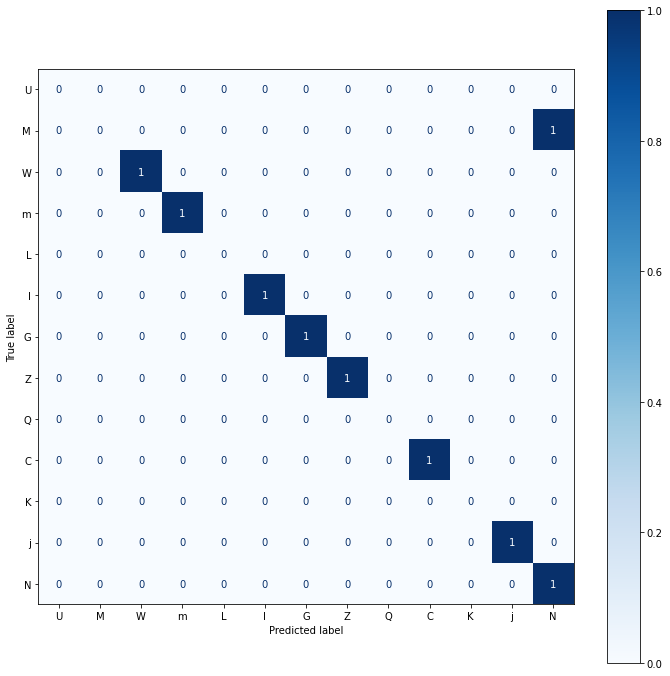

-------------------------------------
-------------------------------------
Mutant: 1
[29, 42, 3, 28, 18, 17, 46, 6, 15, 45, 24, 32, 13]
['d', 'q', 'D', 'c', 'S', 'R', 'u', 'G', 'P', 't', 'Y', 'g', 'N']


label,prediction,correct
d,d,True
q,q,True
Q,D,False
c,c,True
O,S,False
F,R,False
u,u,True
G,G,True
P,P,True
i,t,False


Accuracy: 0.6153846153846154
Precision: 0.6153846153846154
Recall: 0.6153846153846154


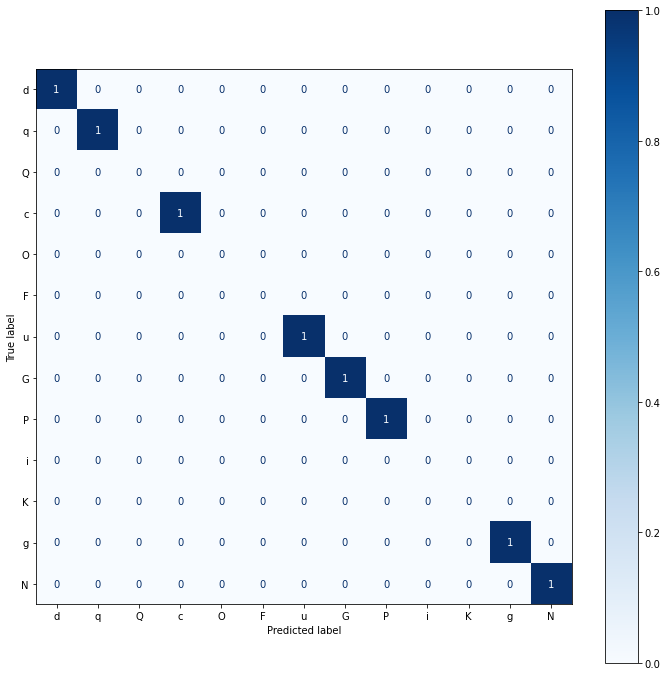

-------------------------------------
-------------------------------------
Mutant: 2
[46, 26, 41, 44, 22, 34, 6, 36, 18, 48, 13, 25, 24]
['u', 'a', 'p', 's', 'W', 'i', 'G', 'k', 'S', 'w', 'N', 'Z', 'Y']


label,prediction,correct
u,u,True
a,a,True
p,p,True
s,s,True
W,W,True
l,i,False
G,G,True
k,k,True
Q,S,False
w,w,True


Accuracy: 0.7692307692307693
Precision: 0.7692307692307693
Recall: 0.7692307692307693


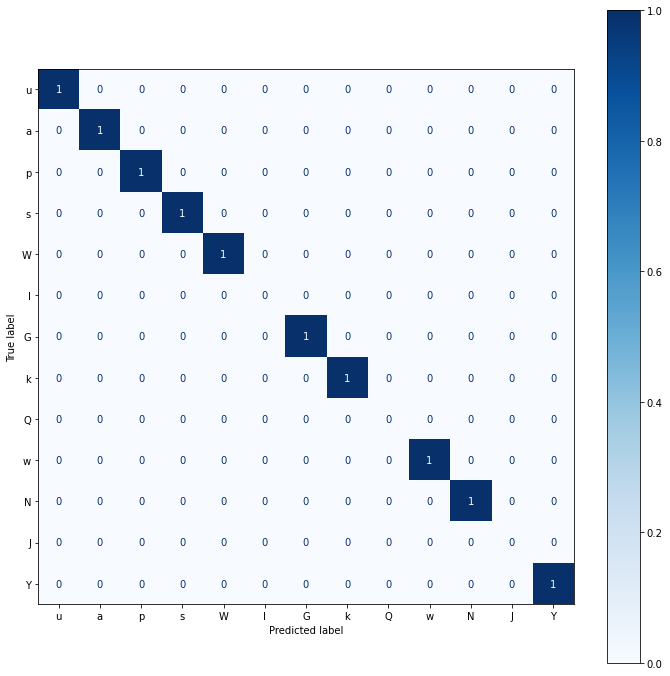

-------------------------------------
-------------------------------------
Mutant: 3
[33, 46, 6, 3, 38, 29, 4, 24, 0, 13, 12, 35, 17]
['h', 'u', 'G', 'D', 'm', 'd', 'E', 'Y', 'A', 'N', 'M', 'j', 'R']


label,prediction,correct
h,h,True
u,u,True
G,G,True
D,D,True
m,m,True
d,d,True
S,E,False
Y,Y,True
A,A,True
N,N,True


Accuracy: 0.8461538461538461
Precision: 0.8461538461538461
Recall: 0.8461538461538461


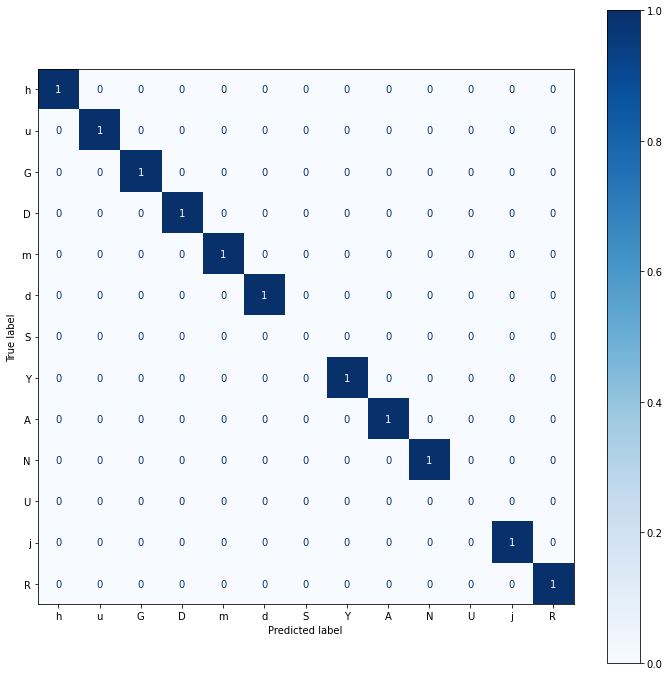

-------------------------------------
-------------------------------------
Mutant: 4
[3, 12, 26, 14, 17, 19, 30, 50, 41, 35, 22, 36, 51]
['D', 'M', 'a', 'O', 'R', 'T', 'e', 'y', 'p', 'j', 'W', 'k', 'z']


label,prediction,correct
K,D,False
U,M,False
a,a,True
E,O,False
F,R,False
T,T,True
c,e,False
y,y,True
p,p,True
j,j,True


Accuracy: 0.5384615384615384
Precision: 0.5384615384615384
Recall: 0.5384615384615384


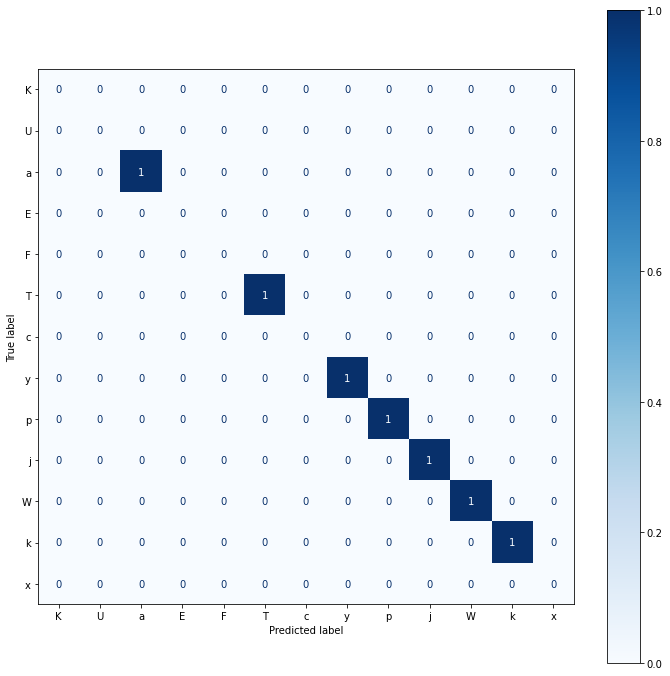

-------------------------------------
-------------------------------------
Mutant: 5
[13, 12, 8, 43, 34, 32, 6, 12, 45, 19, 22, 38, 31]
['N', 'M', 'I', 'r', 'i', 'g', 'G', 'M', 't', 'T', 'W', 'm', 'f']


label,prediction,correct
N,N,True
U,M,False
I,I,True
r,r,True
l,i,False
g,g,True
G,G,True
L,M,False
t,t,True
T,T,True


Accuracy: 0.7692307692307693
Precision: 0.7692307692307693
Recall: 0.7692307692307693


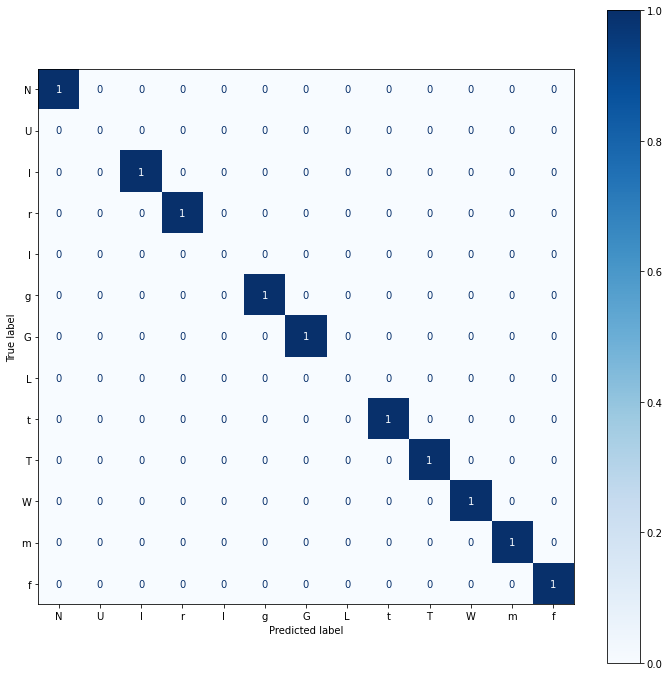

-------------------------------------
-------------------------------------
Mutant: 6
[3, 4, 13, 18, 37, 51, 2, 8, 30, 13, 8, 13, 17]
['D', 'E', 'N', 'S', 'l', 'z', 'C', 'I', 'e', 'N', 'I', 'N', 'R']


label,prediction,correct
K,D,False
B,E,False
N,N,True
S,S,True
i,l,False
z,z,True
G,C,False
I,I,True
e,e,True
M,N,False


Accuracy: 0.46153846153846156
Precision: 0.46153846153846156
Recall: 0.46153846153846156


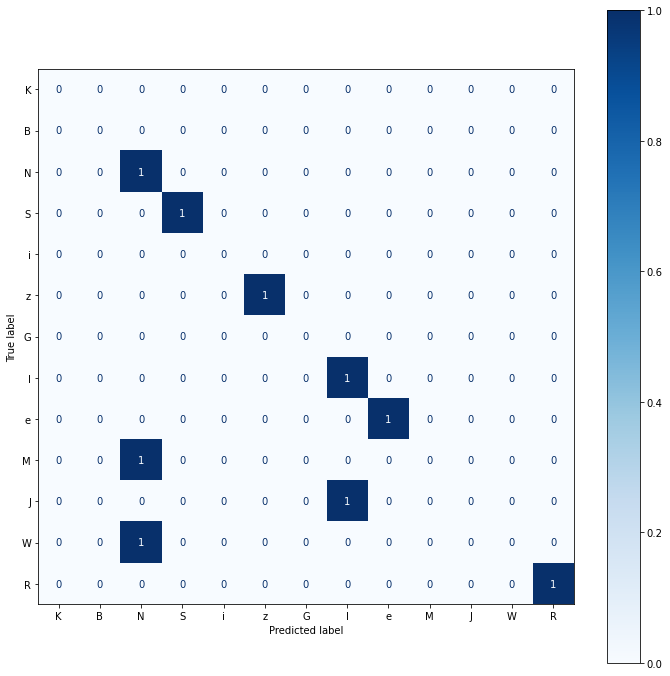

-------------------------------------
-------------------------------------
Mutant: 7
[2, 31, 27, 36, 37, 17, 51, 12, 45, 27, 39, 17, 41]
['C', 'f', 'b', 'k', 'l', 'R', 'z', 'M', 't', 'b', 'n', 'R', 'p']


label,prediction,correct
C,C,True
f,f,True
L,b,False
k,k,True
l,l,True
F,R,False
z,z,True
M,M,True
t,t,True
b,b,True


Accuracy: 0.8461538461538461
Precision: 0.8461538461538461
Recall: 0.8461538461538461


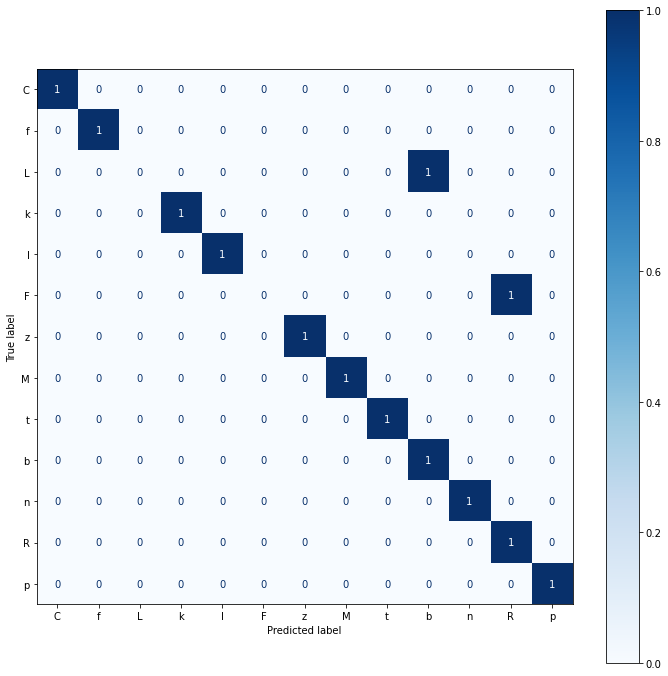

-------------------------------------
-------------------------------------
Mutant: 8
[12, 34, 35, 3, 50, 2, 7, 24, 8, 36, 4, 26, 13]
['M', 'i', 'j', 'D', 'y', 'C', 'H', 'Y', 'I', 'k', 'E', 'a', 'N']


label,prediction,correct
U,M,False
i,i,True
j,j,True
D,D,True
y,y,True
C,C,True
H,H,True
Y,Y,True
I,I,True
k,k,True


Accuracy: 0.9230769230769231
Precision: 0.9230769230769231
Recall: 0.9230769230769231


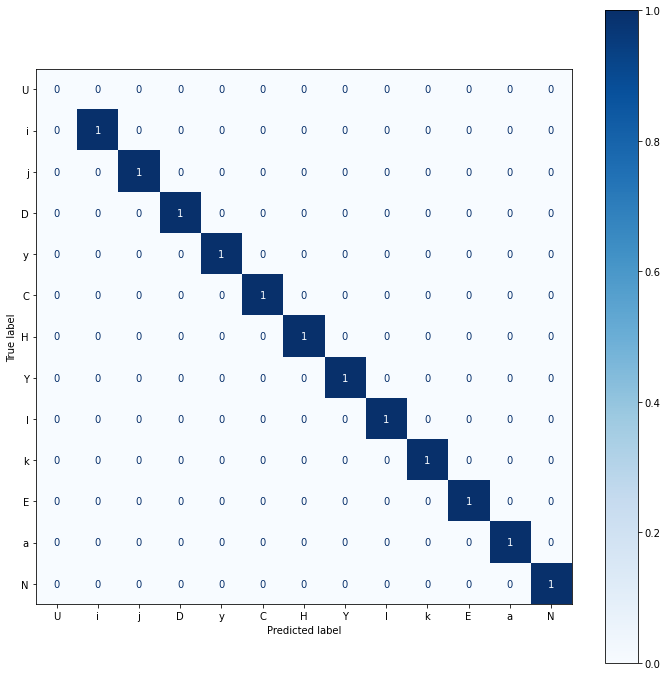

-------------------------------------


In [51]:
mutant_summary = [full_prediction(
    dataset = mutant,
    dictionary_label_map = mapping_dict['label'],
    iteration = iteration,
    r_state = iteration,
    show_failures = False)
 for mutant, iteration in zip(mutant_dfs, range(0, len(mutant_dfs)))]

In [52]:
# sum_mutation = pd.concat(mutant_summary, axis = 0, ignore_index = True)

In [53]:
# sum_mutation.to_csv('mutation_summary_SGD_'+str(n_mutations)+'.csv', index = False)

In [54]:
from glob import glob
filenames = glob('mutation_summary_*.csv')
ms_dfs = [pd.read_csv(f) for f in filenames]

In [55]:
pd.concat(ms_dfs, ignore_index = True)

,Number_of_mutations,Accuracy,Precision,Recall
0,0,1.000000,1.000000,1.000000
1,0,1.000000,1.000000,1.000000
2,0,1.000000,1.000000,1.000000
3,0,1.000000,1.000000,1.000000
4,0,1.000000,1.000000,1.000000
...,...,...,...,...
148,5,0.538462,0.538462,0.538462
149,5,0.769231,0.769231,0.769231
150,5,0.461538,0.461538,0.461538
151,5,0.846154,0.846154,0.846154


In [56]:
pd.concat(ms_dfs, ignore_index = True)\
.groupby('Number_of_mutations').mean()\
.drop(['Precision', 'Recall'], axis = 1)\
.transpose().describe()

Number_of_mutations,0,1,2,3,4,5,6,7,8,9,10
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.850427,0.888889,0.905983,0.863248,0.794872,0.760684,0.726496,0.589744,0.555556,0.504274,0.478632
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.850427,0.888889,0.905983,0.863248,0.794872,0.760684,0.726496,0.589744,0.555556,0.504274,0.478632
25%,0.850427,0.888889,0.905983,0.863248,0.794872,0.760684,0.726496,0.589744,0.555556,0.504274,0.478632
50%,0.850427,0.888889,0.905983,0.863248,0.794872,0.760684,0.726496,0.589744,0.555556,0.504274,0.478632
75%,0.850427,0.888889,0.905983,0.863248,0.794872,0.760684,0.726496,0.589744,0.555556,0.504274,0.478632
max,0.850427,0.888889,0.905983,0.863248,0.794872,0.760684,0.726496,0.589744,0.555556,0.504274,0.478632


In [57]:
ax.set_ylabel('mae', fontsize = 18)
ax.set_xlabel('Epoch', fontsize = 18)
ax.title.set_size(20)

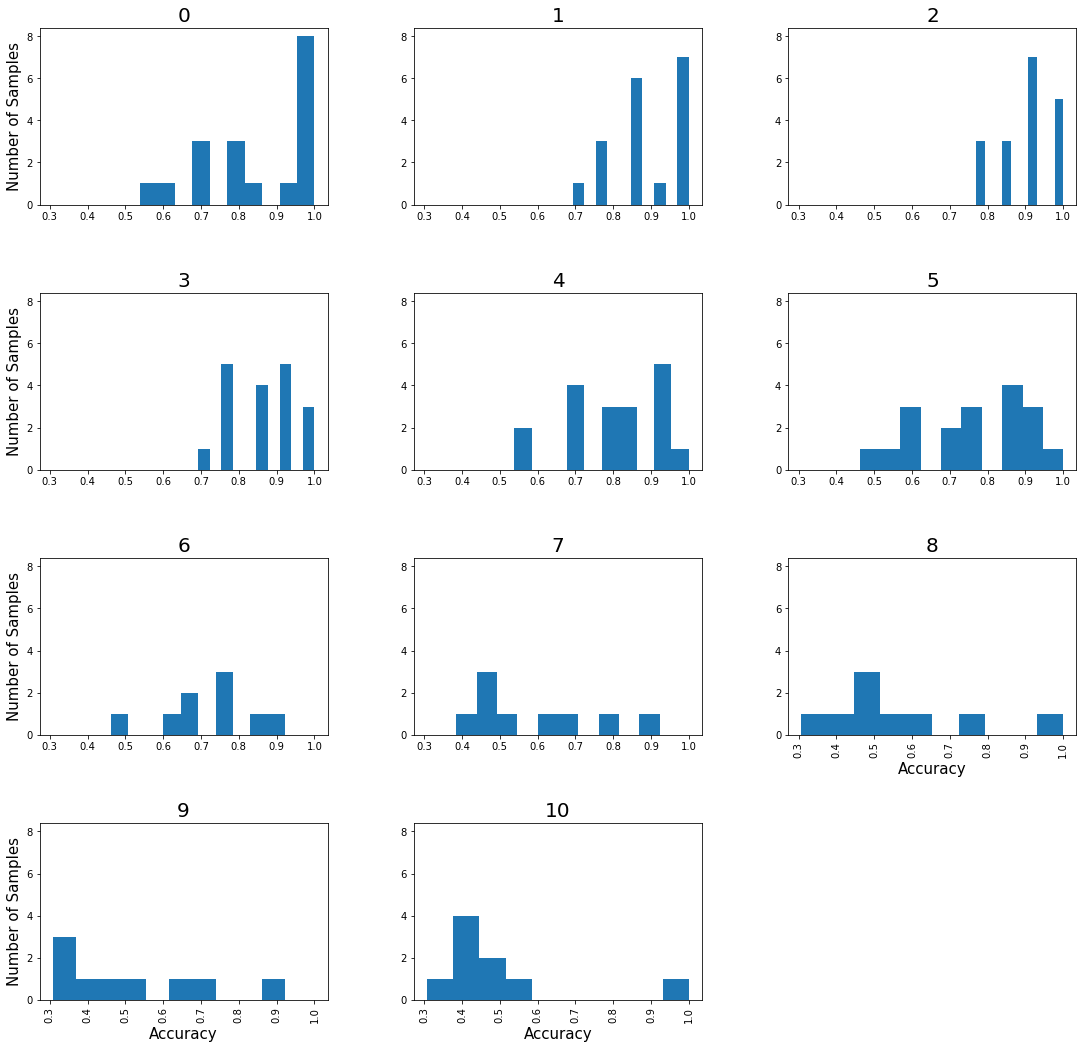

In [58]:
ax_array = pd.concat(ms_dfs, ignore_index = True)\
.set_index('Number_of_mutations')\
.hist(column = 'Accuracy', by = 'Number_of_mutations', figsize = (18,18), sharey = True, sharex = True)
for ax_r in ax_array:
    for ax in ax_r:
        ax.set_ylabel('Number of Samples', fontsize = 15)
        ax.set_xlabel('Accuracy', fontsize = 15)
        ax.title.set_size(20)
        ax.xaxis.set_tick_params(which = 'both', labelbottom=True)
        ax.yaxis.set_tick_params(which = 'both', labelbottom = True)
plt.show()

In [59]:
pd.concat(ms_dfs, ignore_index = True).groupby('Number_of_mutations').mean()

,Accuracy,Precision,Recall
Number_of_mutations,,,
0,0.850427,0.850427,0.850427
1,0.888889,0.888889,0.888889
2,0.905983,0.905983,0.905983
3,0.863248,0.863248,0.863248
4,0.794872,0.794872,0.794872
5,0.760684,0.760684,0.760684
6,0.726496,0.726496,0.726496
7,0.589744,0.589744,0.589744
8,0.555556,0.555556,0.555556


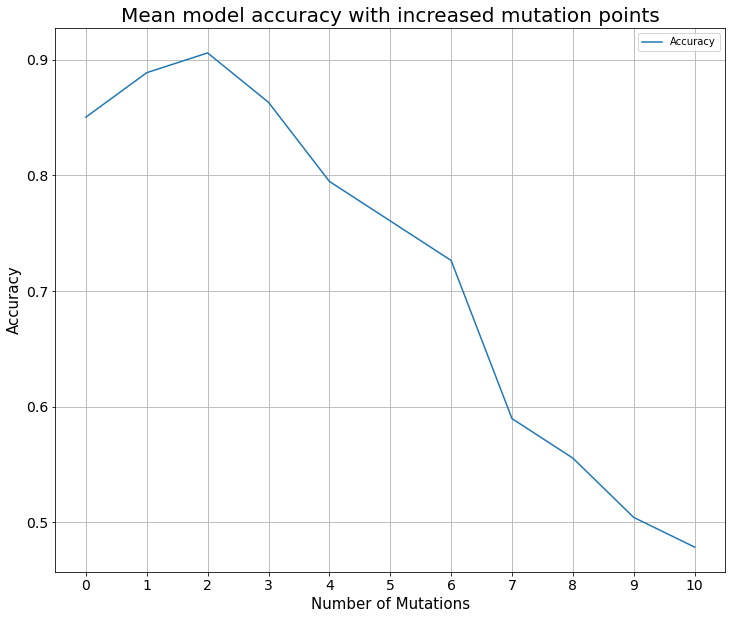

In [60]:
ax = pd.concat(ms_dfs, ignore_index = True).groupby('Number_of_mutations').mean()\
.plot(
    y = 'Accuracy',
    figsize = (12,10),
    grid = True, 
    xticks = range(0,11,1),
    title = 'Mean model accuracy with increased mutation points',
    fontsize = 14
)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_xlabel('Number of Mutations', fontsize = 15)
ax.title.set_size(20)
plt.show()

In [63]:
from glob import glob
filenames = glob('mutation_summary_SGD_*.csv')
ms_sgd_dfs = [pd.read_csv(f) for f in filenames]

In [65]:
pd.concat(ms_sgd_dfs, ignore_index = True).head(5)

,Number_of_mutations,Accuracy,Precision,Recall
0,0,0.538462,0.538462,0.538462
1,0,0.692308,0.692308,0.692308
2,0,0.769231,0.769231,0.769231
3,0,0.846154,0.846154,0.846154
4,0,0.615385,0.615385,0.615385


In [66]:
pd.concat(ms_sgd_dfs, ignore_index = True)\
.groupby('Number_of_mutations').mean()\
.drop(['Precision', 'Recall'], axis = 1)\
.transpose().describe()

Number_of_mutations,0,1,2,3,4,5
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.709402,0.803419,0.854701,0.803419,0.726496,0.709402
std,NaN,NaN,NaN,NaN,NaN,NaN
min,0.709402,0.803419,0.854701,0.803419,0.726496,0.709402
25%,0.709402,0.803419,0.854701,0.803419,0.726496,0.709402
50%,0.709402,0.803419,0.854701,0.803419,0.726496,0.709402
75%,0.709402,0.803419,0.854701,0.803419,0.726496,0.709402
max,0.709402,0.803419,0.854701,0.803419,0.726496,0.709402


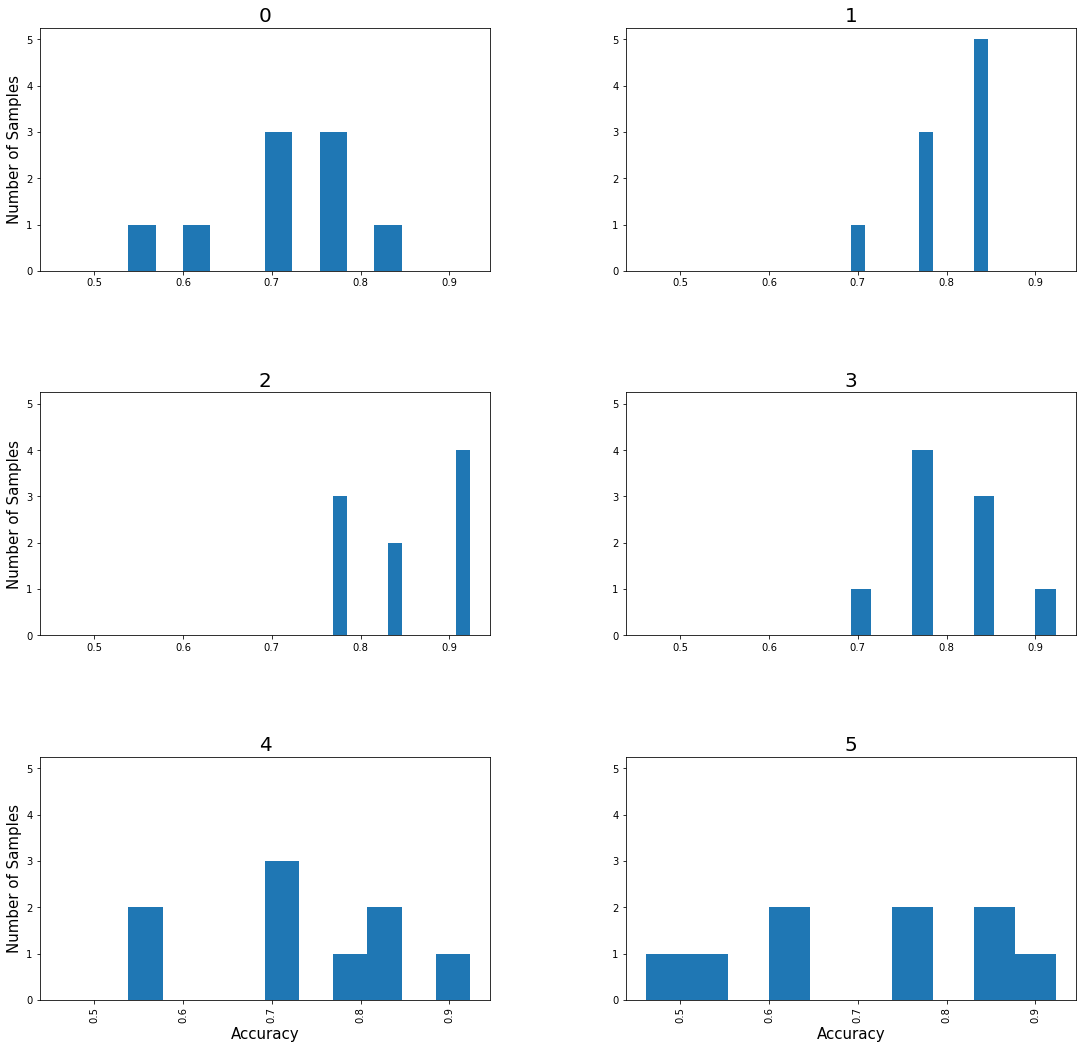

In [67]:
ax_array = pd.concat(ms_sgd_dfs, ignore_index = True)\
.set_index('Number_of_mutations')\
.hist(column = 'Accuracy', by = 'Number_of_mutations', figsize = (18,18), sharey = True, sharex = True)
for ax_r in ax_array:
    for ax in ax_r:
        ax.set_ylabel('Number of Samples', fontsize = 15)
        ax.set_xlabel('Accuracy', fontsize = 15)
        ax.title.set_size(20)
        ax.xaxis.set_tick_params(which = 'both', labelbottom=True)
        ax.yaxis.set_tick_params(which = 'both', labelbottom = True)
plt.show()

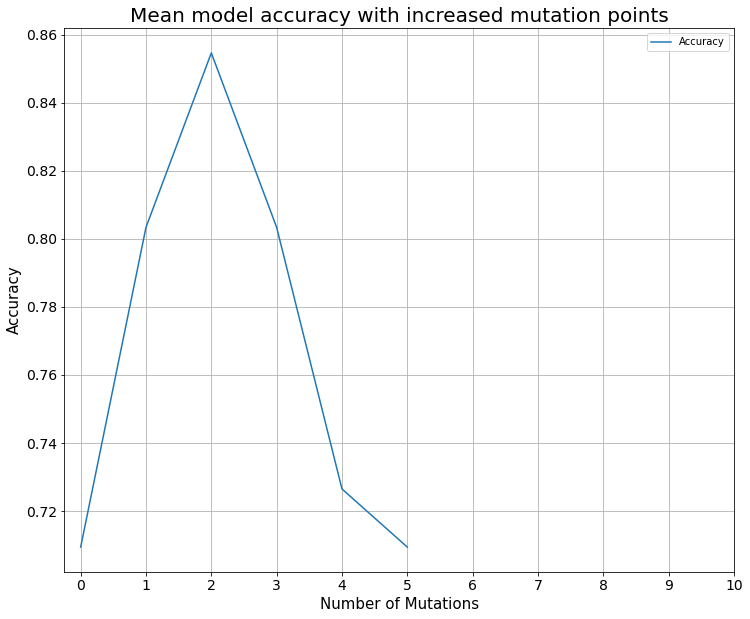

In [68]:
ax = pd.concat(ms_sgd_dfs, ignore_index = True).groupby('Number_of_mutations').mean()\
.plot(
    y = 'Accuracy',
    figsize = (12,10),
    grid = True, 
    xticks = range(0,11,1),
    title = 'Mean model accuracy with increased mutation points',
    fontsize = 14
)
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_xlabel('Number of Mutations', fontsize = 15)
ax.title.set_size(20)
plt.show()

#### Visualize with hi-plot

In [61]:
# import hiplot as hip

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 166)               8300      
_________________________________________________________________
dense_1 (Dense)              (None, 52)                8684      
Total params: 16,984
Trainable params: 16,984
Non-trainable params: 0
_________________________________________________________________
